# NBaIoT SOM+Algos CLASSIFY

## Device 4

- Training on device 4 (using both Mirai and Gafgyt).
- Testing on device 4 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 17:12:25.678404: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 4

In [8]:
train_index

4

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((175240, 115), (175240,)),
 ((312723, 115), (312723,)),
 ((610714, 115), (610714,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((122668, 115), (52572, 115), (122668,), (52572,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((218906, 115), (93817, 115), (218906,), (93817,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((427499, 115), (183215, 115), (427499,), (183215,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

122668


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(122668, 115) (122668,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(245336, 115) (245336,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(122668, 115) (122668,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(245336, 115) (245336,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(146389, 115) (146389,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((52572, 115), (93817, 115), (52572,), (93817,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(235787, 115) (235787,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(165050, 115) (165050,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 3.30017036e-03  4.54327336e-02  3.82635778e-18 ...  4.88741949e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 3.29612813e-03  4.13024864e-02  2.39672960e-11 ...  3.79665784e-18
  -1.09282808e-34  0.00000000e+00]
 [ 3.29748335e-03  1.07360998e-01  6.99620609e-06 ...  4.21063037e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.14652201e-02  4.54327336e-02  4.09966904e-16 ...  4.59138745e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 9.88821306e-03  4.54327336e-02  3.55304651e-12 ...  4.47326334e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.84420109e-03  4.93568758e-02  1.23448964e-04 ...  1.61130067e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.999    146389
weighted avg      0.999     0.999     0.999    146389



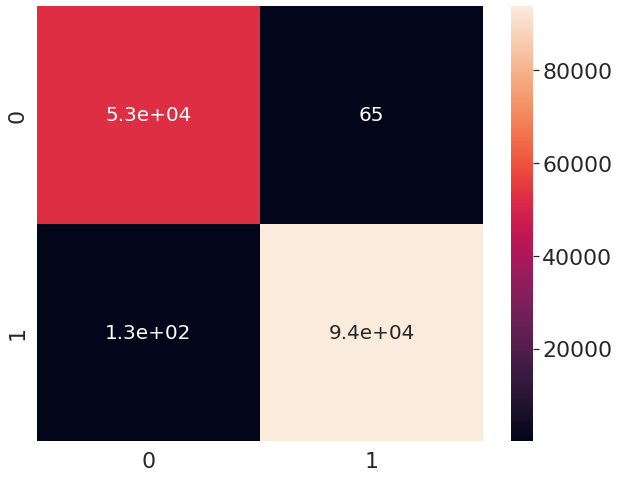

AUC score:  9.987049505863461e-01


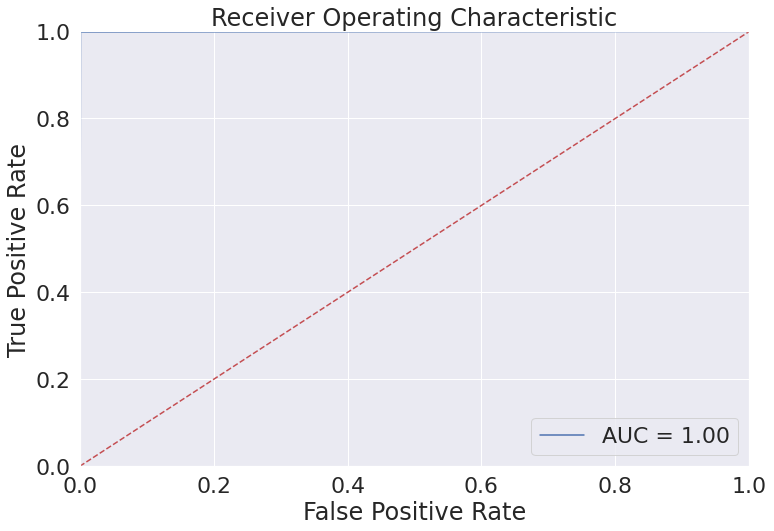

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.999    146389
weighted avg      0.999     0.999     0.999    146389



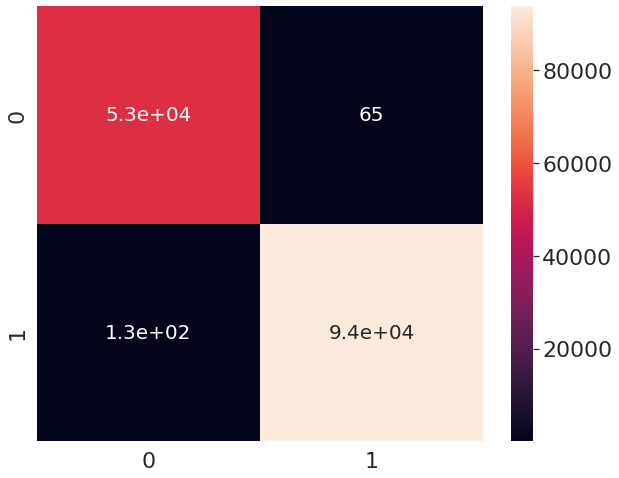

AUC score:  0.9987049505863461


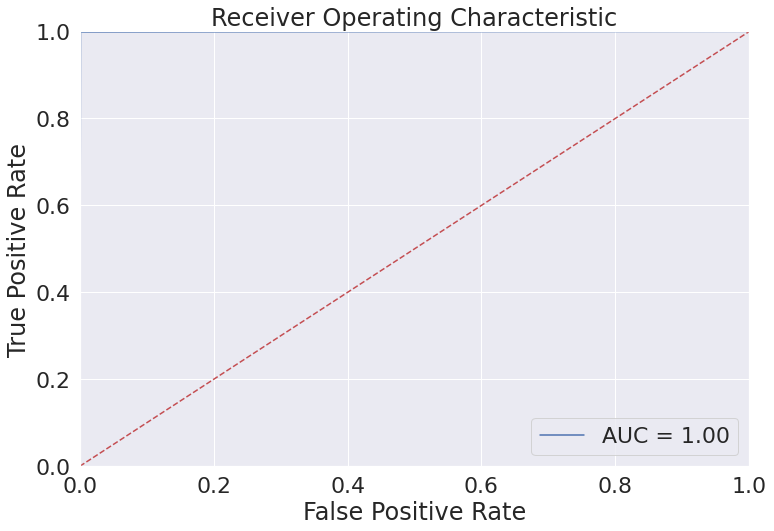

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.999    146389
weighted avg      0.999     0.999     0.999    146389



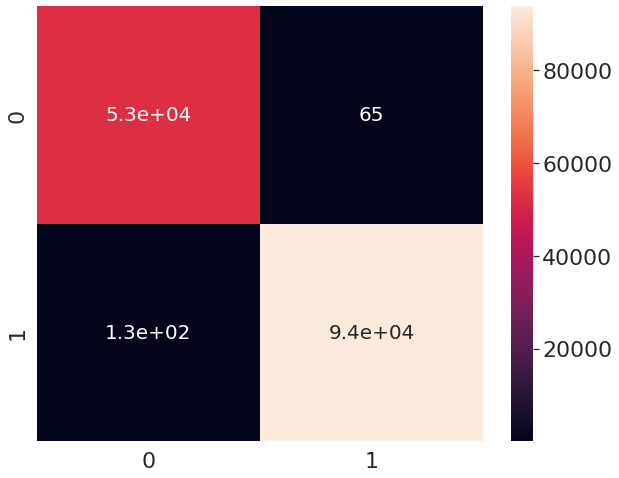

AUC score:  0.9987049505863461


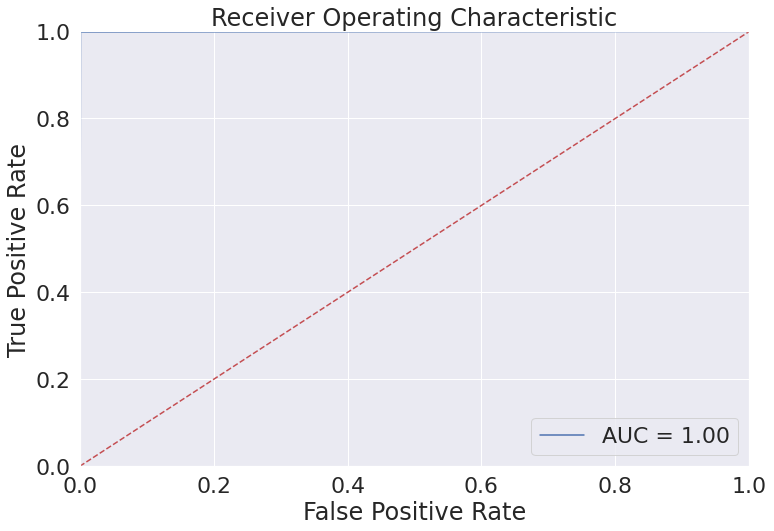

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.999    146389
weighted avg      0.999     0.999     0.999    146389



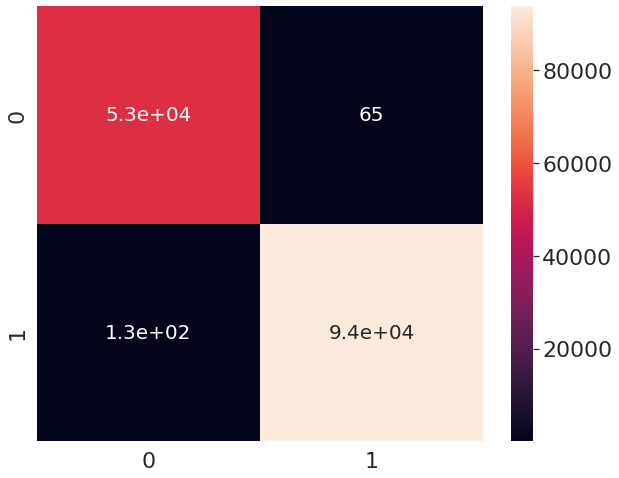

AUC score:  0.9987049505863461


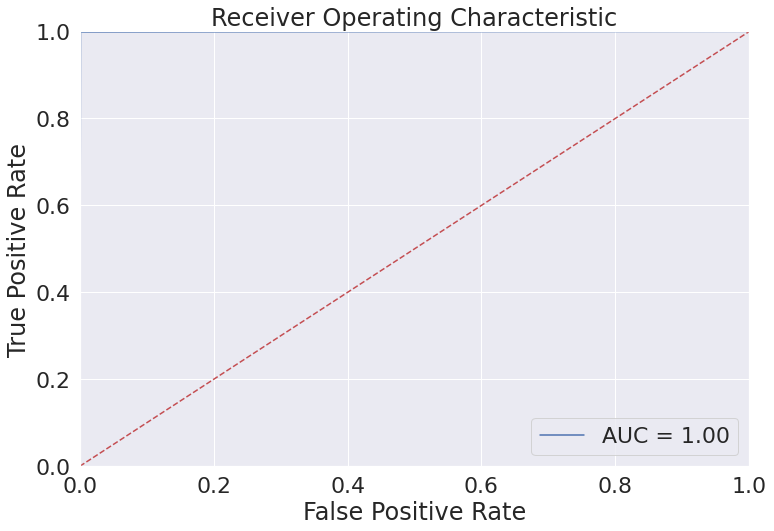

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.999     0.998     52572
           2      0.999     0.999     0.999     93817

    accuracy                          0.999    146389
   macro avg      0.998     0.999     0.999    146389
weighted avg      0.999     0.999     0.999    146389



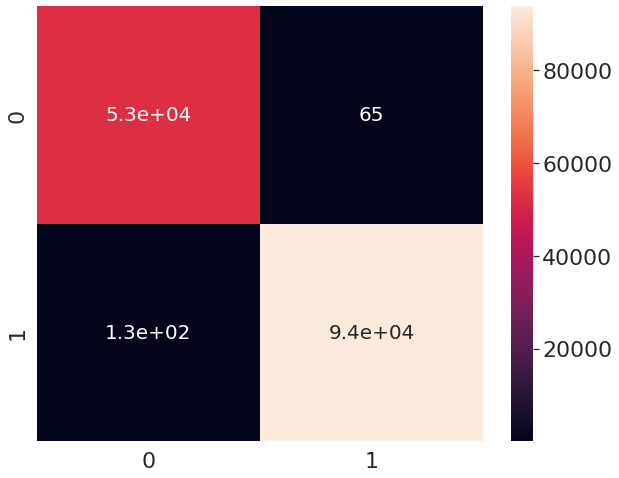

AUC score:  0.9987049505863461


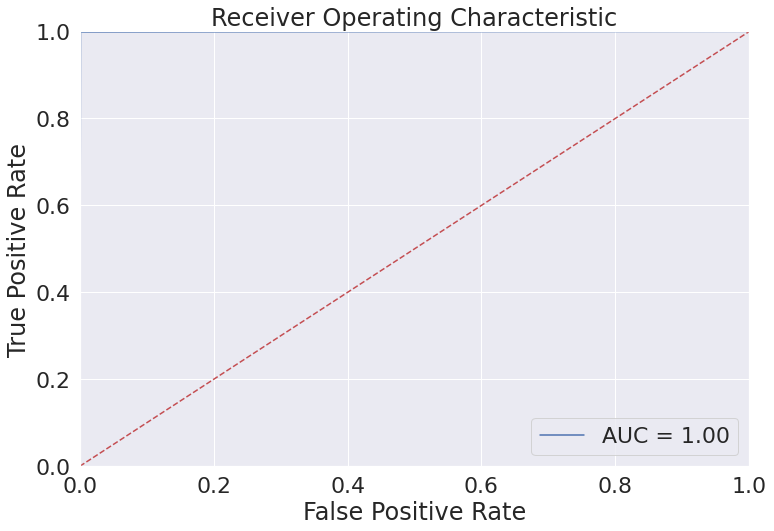

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.461     0.999     0.631     36592
           2      1.000     0.668     0.801    128458

    accuracy                          0.741    165050
   macro avg      0.731     0.833     0.716    165050
weighted avg      0.880     0.741     0.763    165050



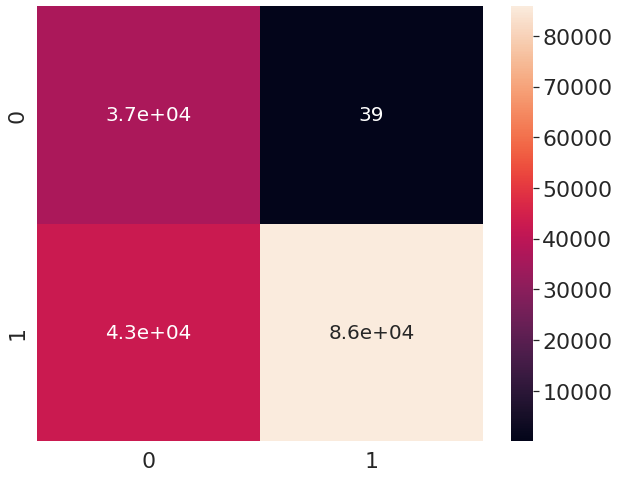

AUC score:  0.8334517453120895


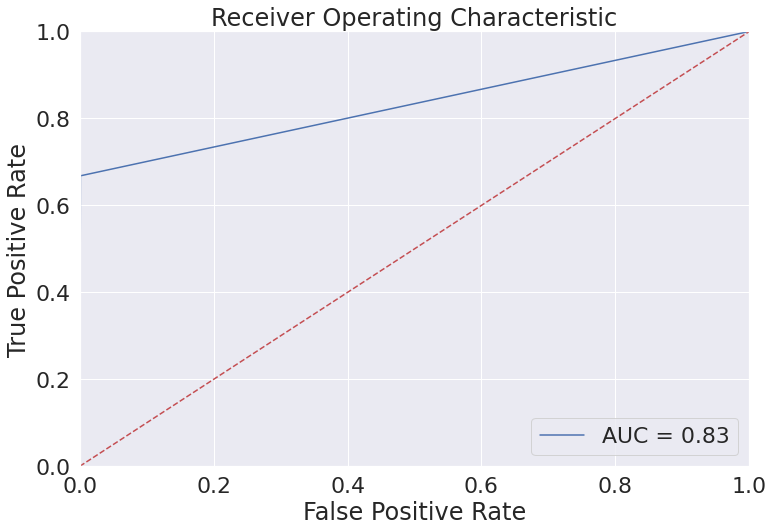

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.461     0.999     0.631     36592
           2      1.000     0.668     0.801    128458

    accuracy                          0.741    165050
   macro avg      0.731     0.833     0.716    165050
weighted avg      0.880     0.741     0.763    165050



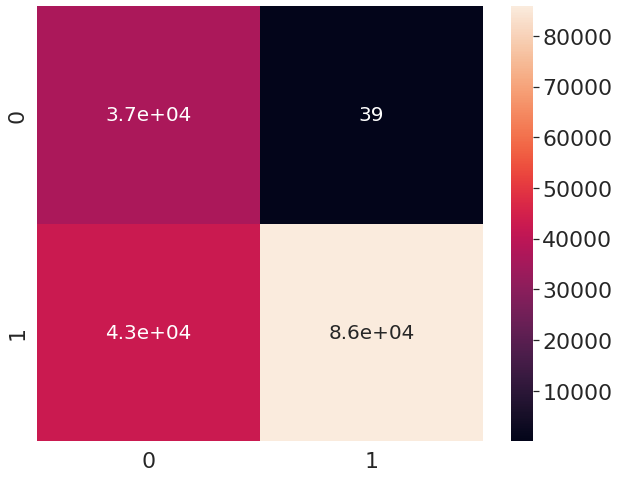

AUC score:  0.8334517453120895


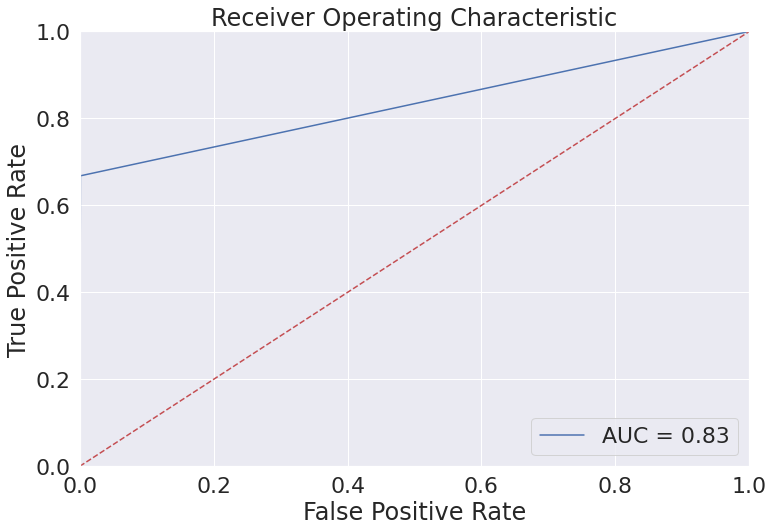

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.461     0.999     0.631     36592
           2      1.000     0.668     0.801    128458

    accuracy                          0.741    165050
   macro avg      0.731     0.833     0.716    165050
weighted avg      0.880     0.741     0.763    165050



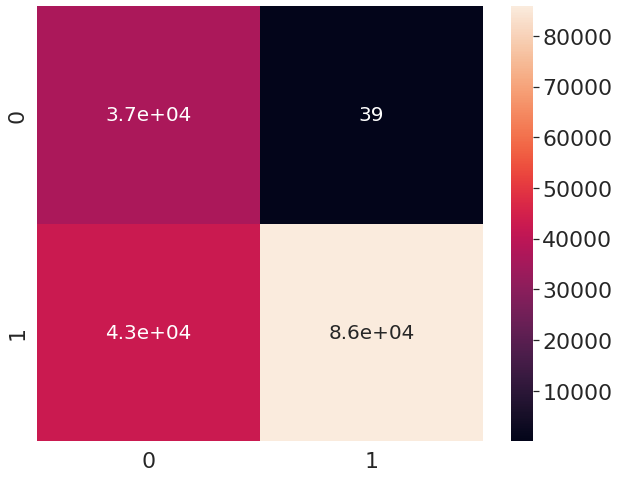

AUC score:  0.8334517453120895


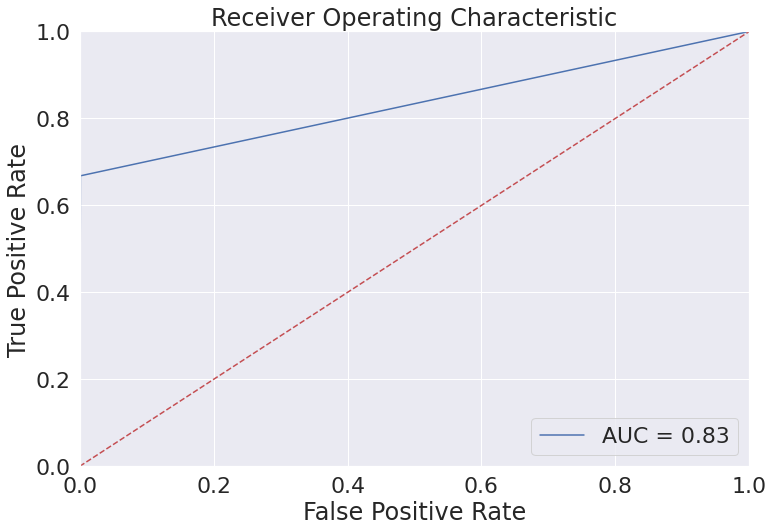

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.461     0.999     0.631     36592
           2      1.000     0.668     0.801    128458

    accuracy                          0.741    165050
   macro avg      0.731     0.833     0.716    165050
weighted avg      0.880     0.741     0.763    165050



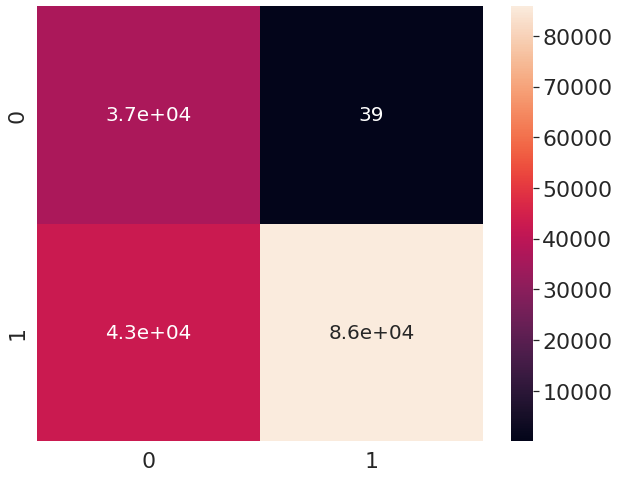

AUC score:  0.8334517453120895


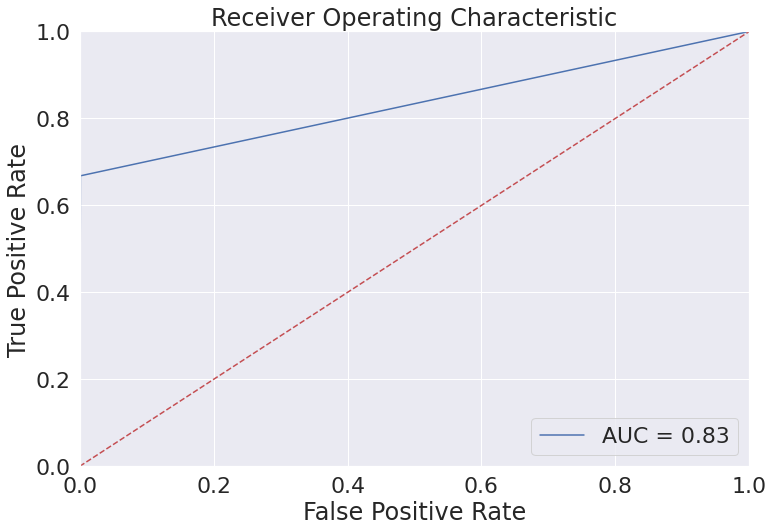

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.461     0.999     0.631     36592
           2      1.000     0.668     0.801    128458

    accuracy                          0.741    165050
   macro avg      0.731     0.833     0.716    165050
weighted avg      0.880     0.741     0.763    165050



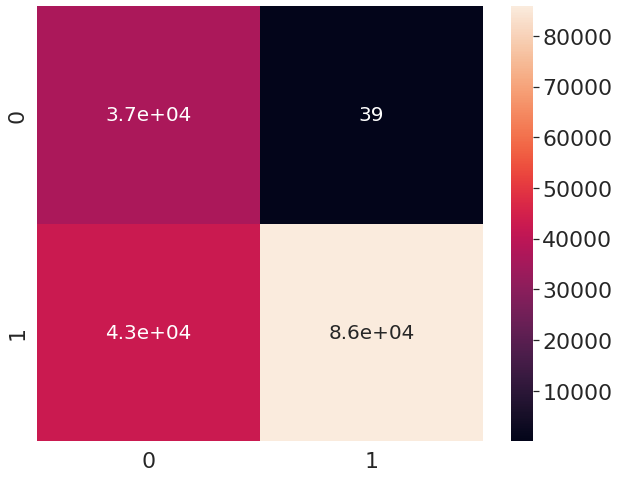

AUC score:  0.8334517453120895


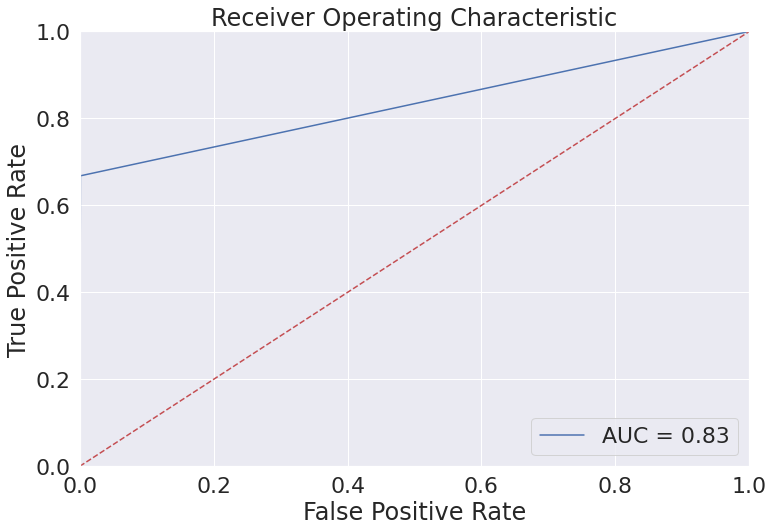

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(245336, 115) (245336,)
------------Scale data-----------------
(245336, 115) (245336,)
X_train_scaled
[[ 2.93887366e-03  4.54327336e-02  3.82635778e-18 ...  4.89050855e-04
  -3.30394901e-06 -3.09336247e-02]
 [ 2.93527396e-03  4.13024864e-02  2.39672960e-11 ...  3.79905749e-18
  -1.09282808e-34  0.00000000e+00]
 [ 2.93648081e-03  1.07360998e-01  6.99620609e-06 ...  4.21329168e-03
  -6.01255452e-04 -5.15984454e-02]
 ...
 [ 1.02100285e-02  4.54327336e-02  4.09966904e-16 ...  4.59428941e-04
  -8.55427389e-06 -3.18619667e-02]
 [ 8.80566931e-03  4.54327336e-02  3.55304651e-12 ...  4.47609063e-01
   6.53389486e-02  2.27402852e-01]
 [ 6.09491029e-03  4.93568758e-02  1.23448964e-04 ...  1.61231908e-04
   4.30190645e-05  7.39028403e-02]]
---------Normalize data--------------
(245336, 115) (245336,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.996     0.947     52572
           2      0.998     0.940     0.968     93817

    accuracy                          0.960    146389
   macro avg      0.950     0.968     0.958    146389
weighted avg      0.964     0.960     0.961    146389



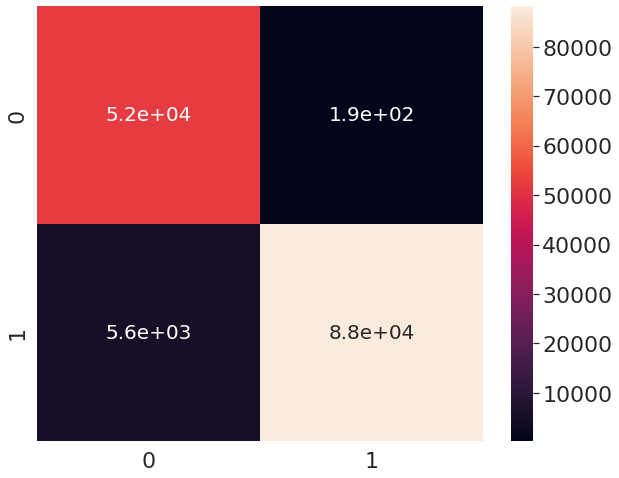

AUC score:  9.681991269326486e-01


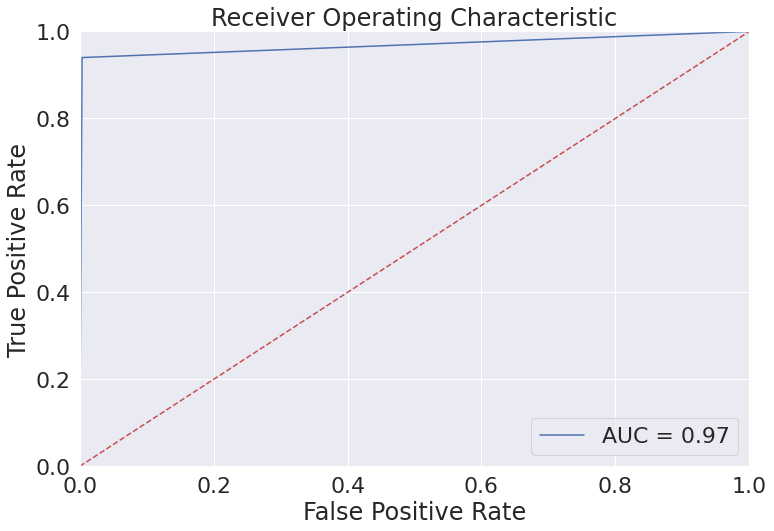

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.996     0.947     52572
           2      0.998     0.940     0.968     93817

    accuracy                          0.960    146389
   macro avg      0.950     0.968     0.958    146389
weighted avg      0.964     0.960     0.961    146389



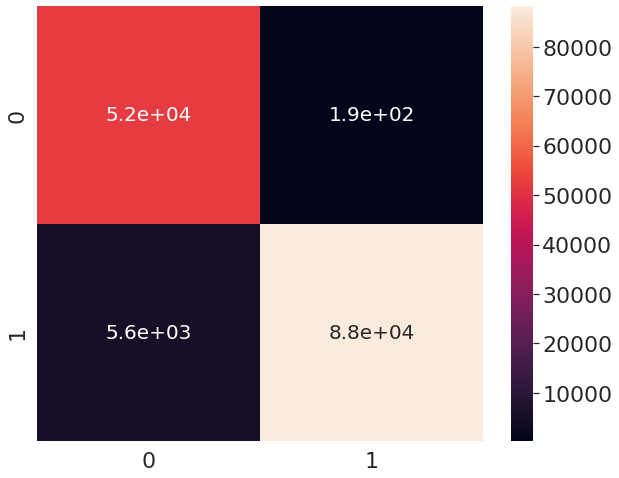

AUC score:  0.9681991269326486


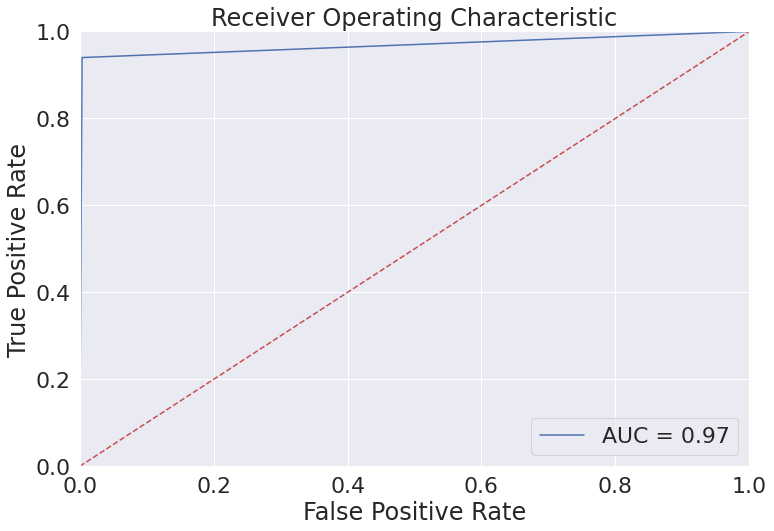

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.996     0.947     52572
           2      0.998     0.940     0.968     93817

    accuracy                          0.960    146389
   macro avg      0.950     0.968     0.958    146389
weighted avg      0.964     0.960     0.961    146389



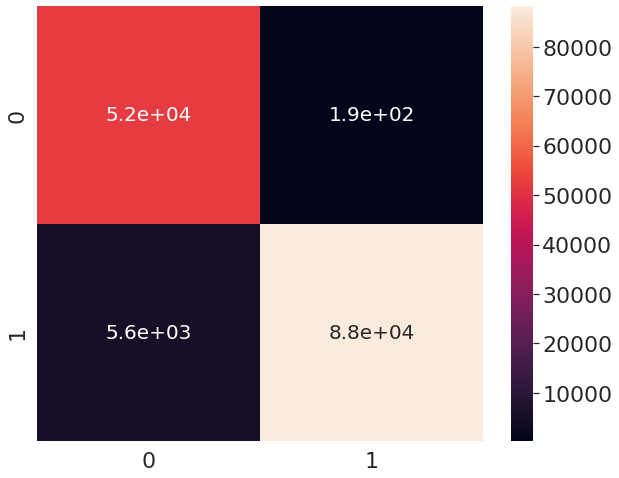

AUC score:  0.9681991269326486


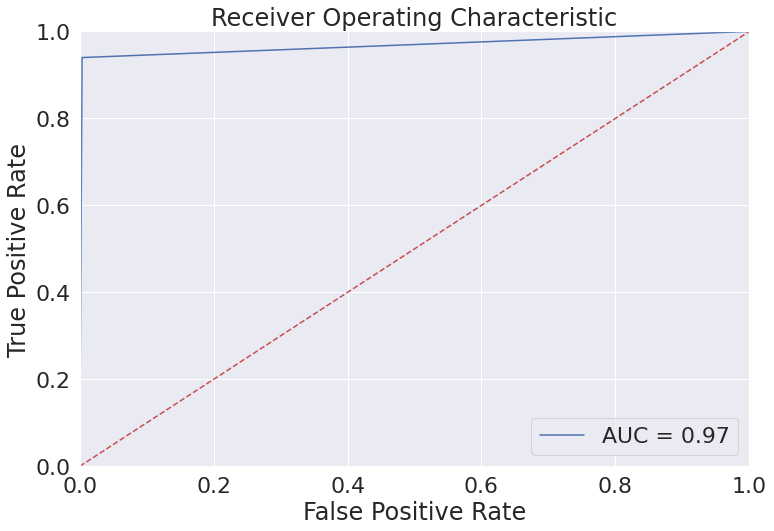

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.996     0.947     52572
           2      0.998     0.940     0.968     93817

    accuracy                          0.960    146389
   macro avg      0.950     0.968     0.958    146389
weighted avg      0.964     0.960     0.961    146389



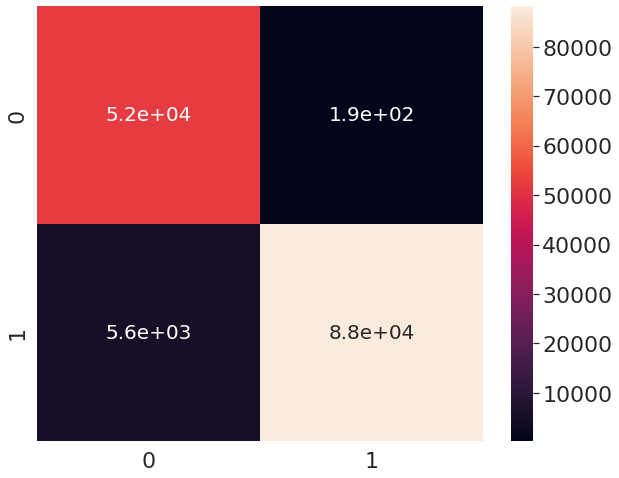

AUC score:  0.9681991269326486


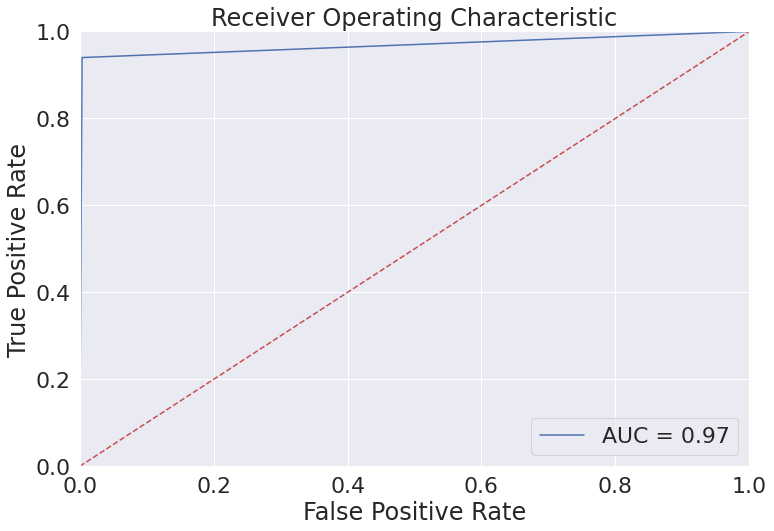

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (146389, 115) (146389,)
----------------------Test is starting----------------------
Scale data
Shape:  (146389, 115) (146389,)
Normalize data
Shape:  (146389, 115) (146389,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.996     0.947     52572
           2      0.998     0.940     0.968     93817

    accuracy                          0.960    146389
   macro avg      0.950     0.968     0.958    146389
weighted avg      0.964     0.960     0.961    146389



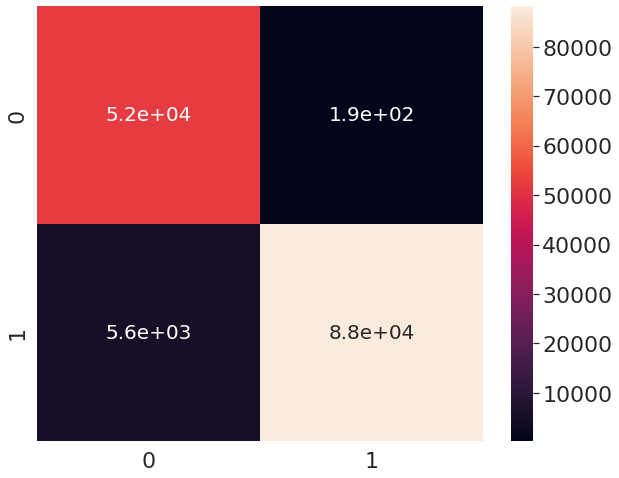

AUC score:  0.9681991269326486


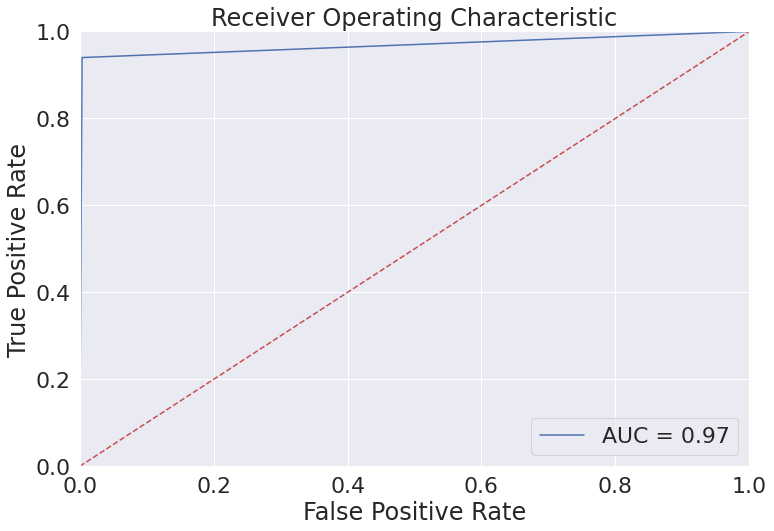

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     36592
           2      0.999     1.000     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.998     0.999    165050
weighted avg      0.999     0.999     0.999    165050



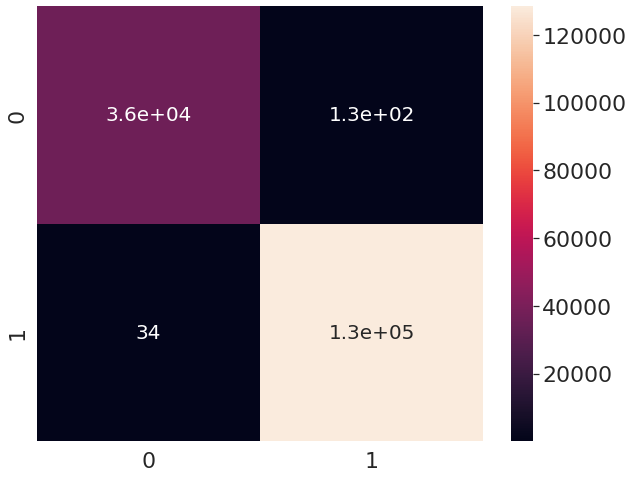

AUC score:  0.9980366597136314


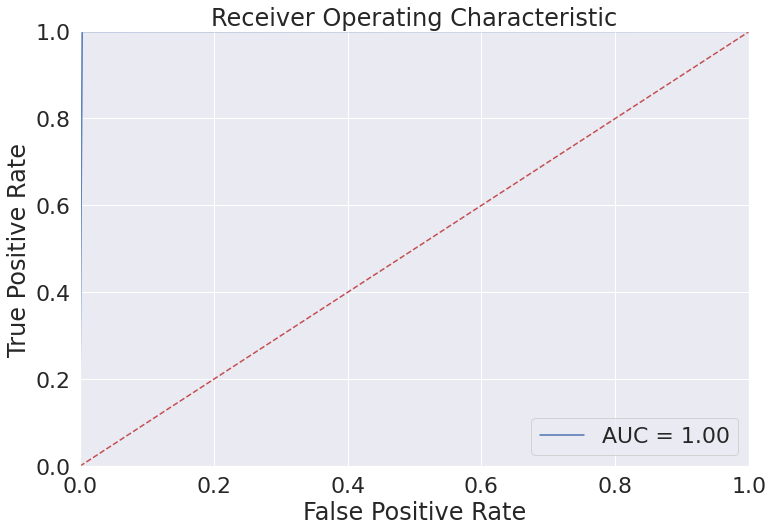

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     36592
           2      0.999     1.000     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.998     0.999    165050
weighted avg      0.999     0.999     0.999    165050



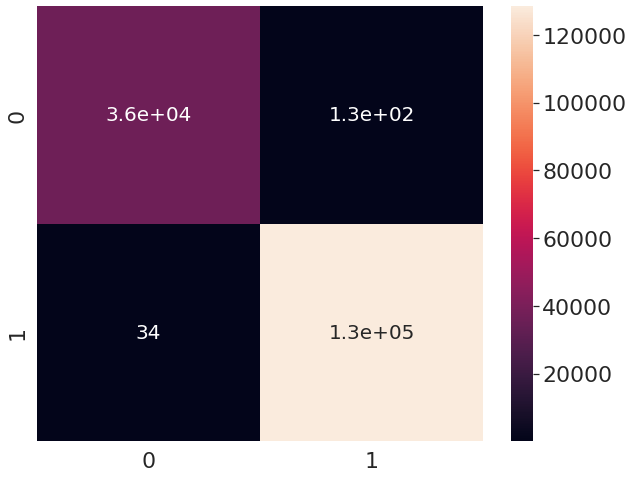

AUC score:  0.9980366597136314


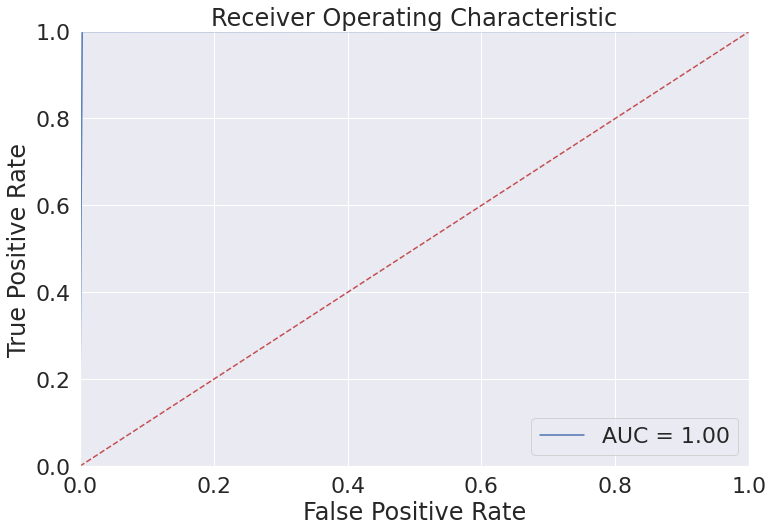

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     36592
           2      0.999     1.000     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.998     0.999    165050
weighted avg      0.999     0.999     0.999    165050



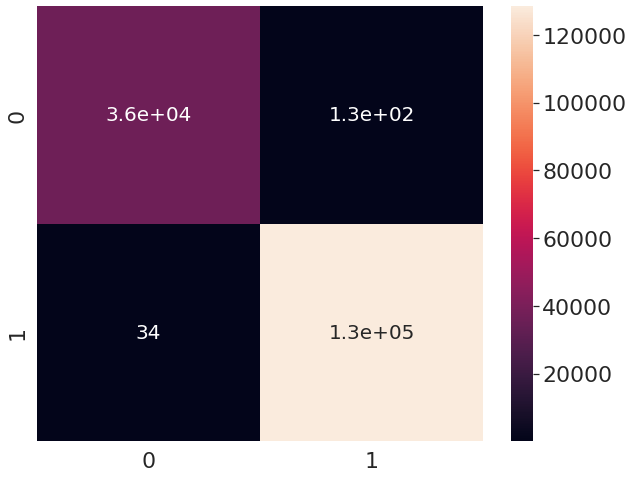

AUC score:  0.9980366597136314


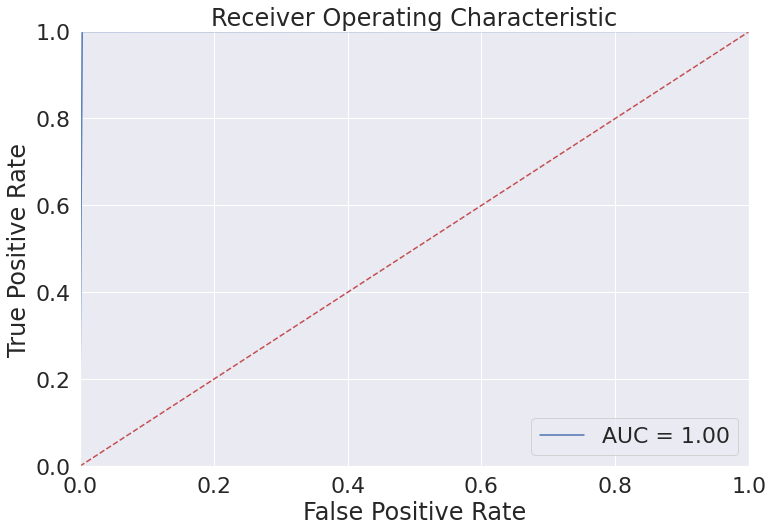

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     36592
           2      0.999     1.000     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.998     0.999    165050
weighted avg      0.999     0.999     0.999    165050



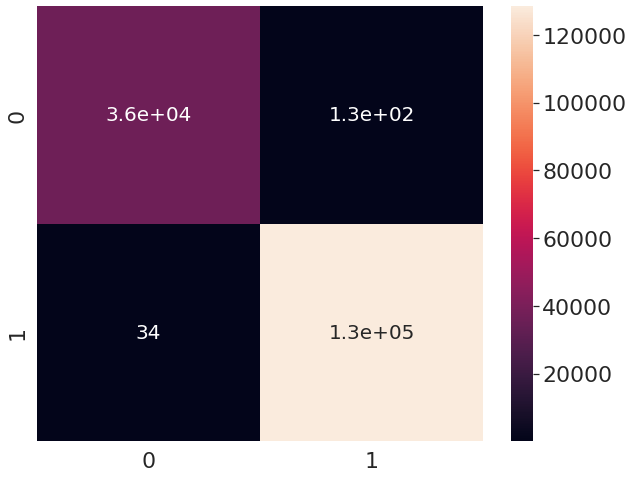

AUC score:  0.9980366597136314


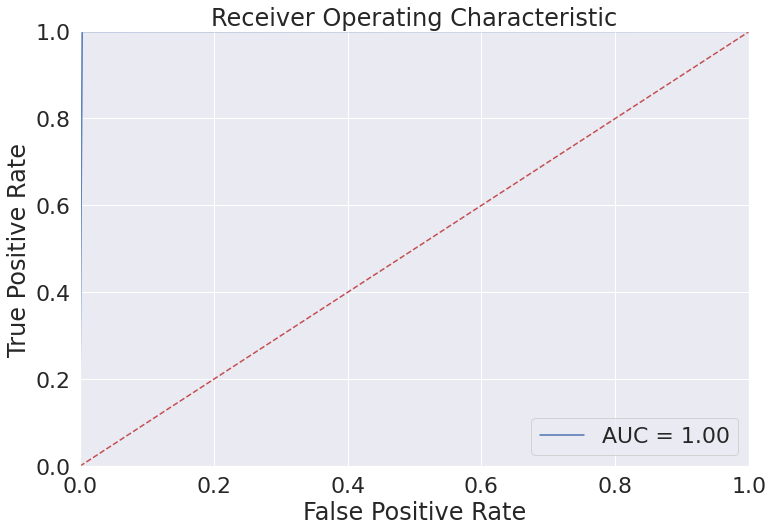

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (165050, 115) (165050,)
----------------------Test is starting----------------------
Scale data
Shape:  (165050, 115) (165050,)
Normalize data
Shape:  (165050, 115) (165050,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     36592
           2      0.999     1.000     0.999    128458

    accuracy                          0.999    165050
   macro avg      0.999     0.998     0.999    165050
weighted avg      0.999     0.999     0.999    165050



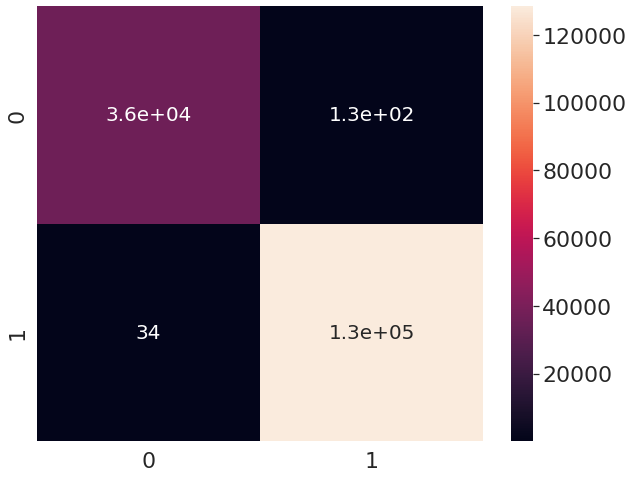

AUC score:  0.9980366597136314


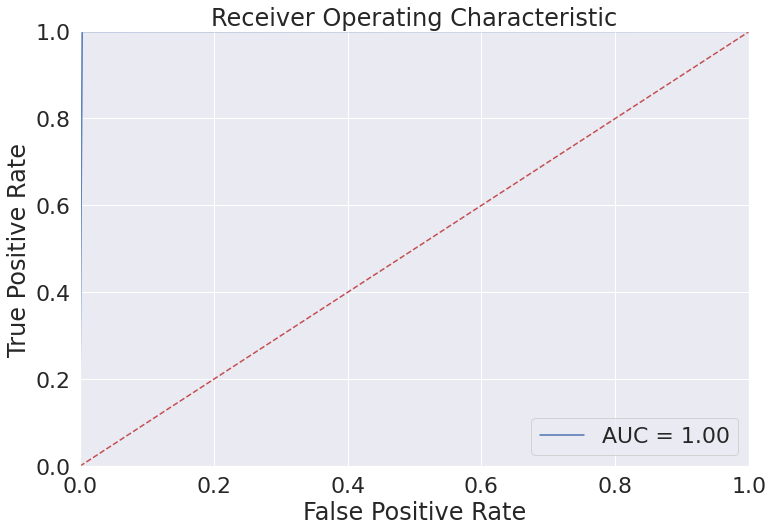

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)

# 3. Train and test with other algos

In [30]:
X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

((245336, 115), (245336, 115), (146389, 115), (165050, 115))

In [31]:
type(X_train_gafgyt_1), type(X_test_gafgyt)

(numpy.ndarray, numpy.ndarray)

In [32]:
y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

((245336,), (245336,), (146389,), (165050,))

In [33]:
np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [34]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [35]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.995     1.000     0.997     52572
           1      1.000     0.997     0.998     93817

    accuracy                          0.998    146389
   macro avg      0.997     0.998     0.998    146389
weighted avg      0.998     0.998     0.998    146389



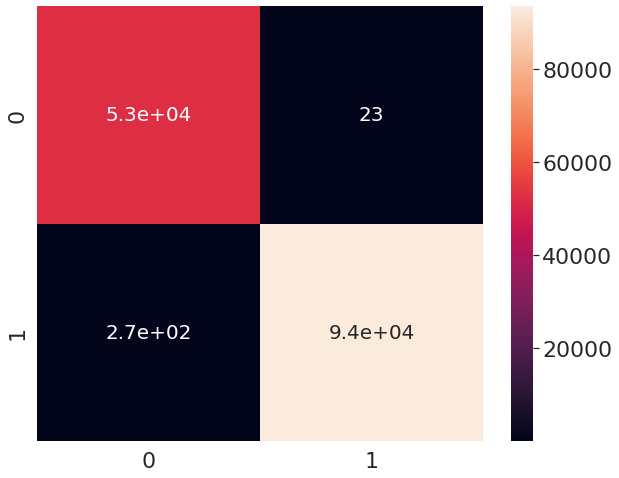

AUC score:  0.9983316217137393


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


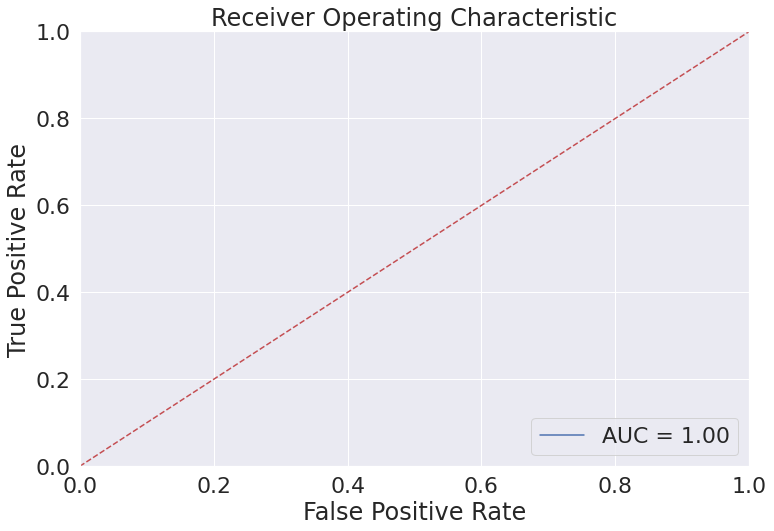

In [36]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.354     1.000     0.523     36592
           1      1.000     0.480     0.649    128458

    accuracy                          0.596    165050
   macro avg      0.677     0.740     0.586    165050
weighted avg      0.857     0.596     0.621    165050



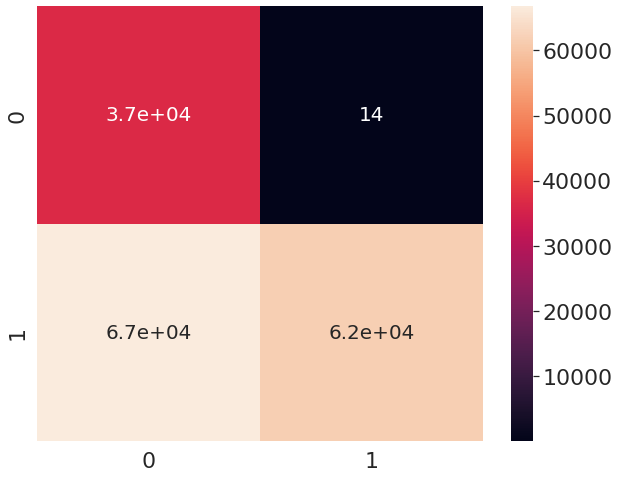

AUC score:  0.7400156172346076


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


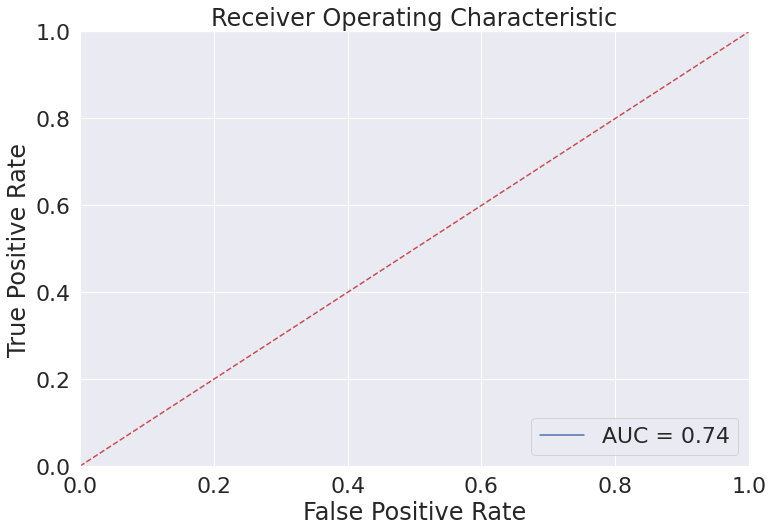

In [37]:
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [38]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.432     0.981     0.600     52572
           1      0.963     0.276     0.429     93817

    accuracy                          0.529    146389
   macro avg      0.698     0.629     0.514    146389
weighted avg      0.772     0.529     0.490    146389



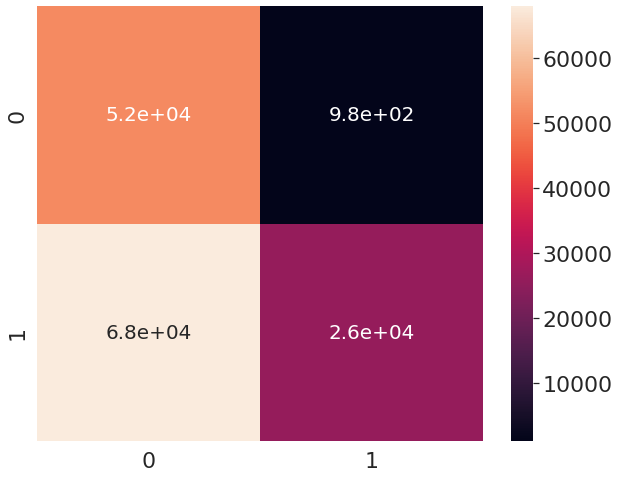

AUC score:  0.6285607257541848


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


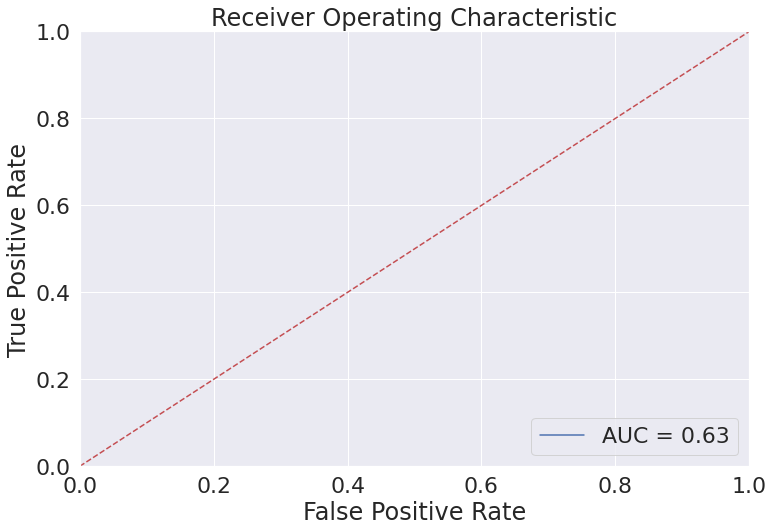

In [39]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.940     0.982     0.960     36592
           1      0.995     0.982     0.988    128458

    accuracy                          0.982    165050
   macro avg      0.967     0.982     0.974    165050
weighted avg      0.982     0.982     0.982    165050



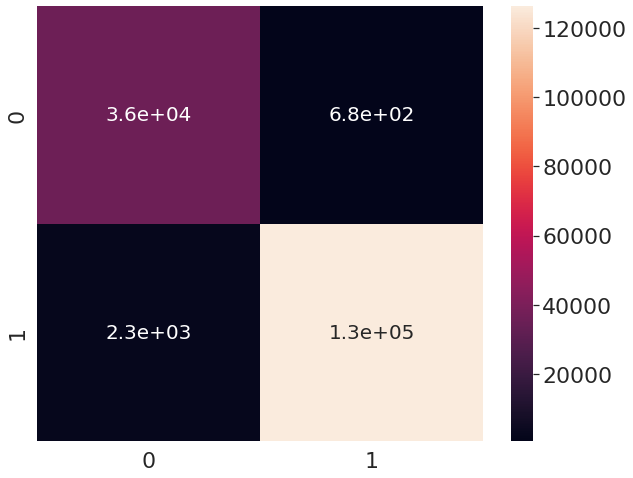

AUC score:  0.9817678503573682


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


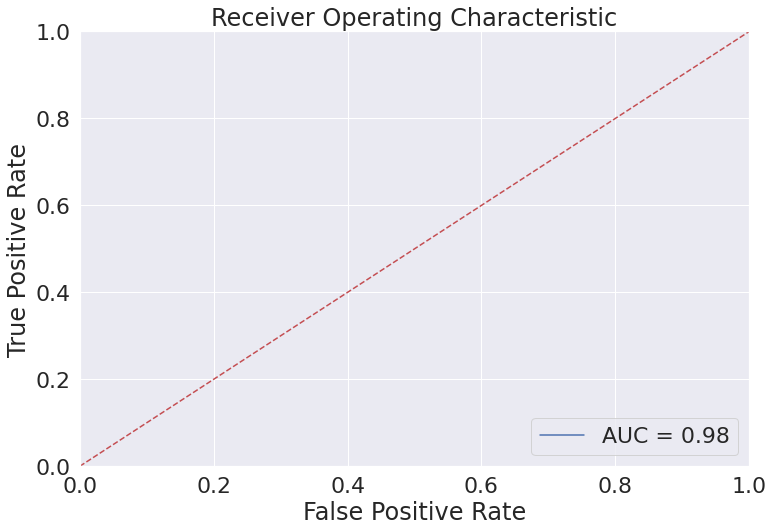

In [40]:
# on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [35]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.373     1.000     0.543     52572
           1      0.999     0.057     0.107     93817

    accuracy                          0.395    146389
   macro avg      0.686     0.528     0.325    146389
weighted avg      0.774     0.395     0.264    146389



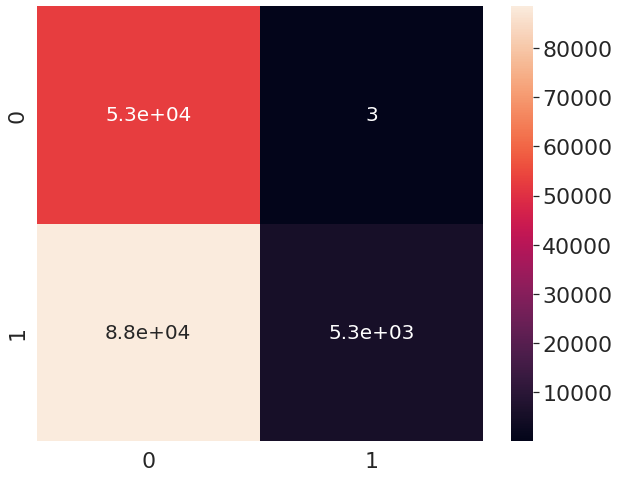

AUC score:  0.5283565151875013


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


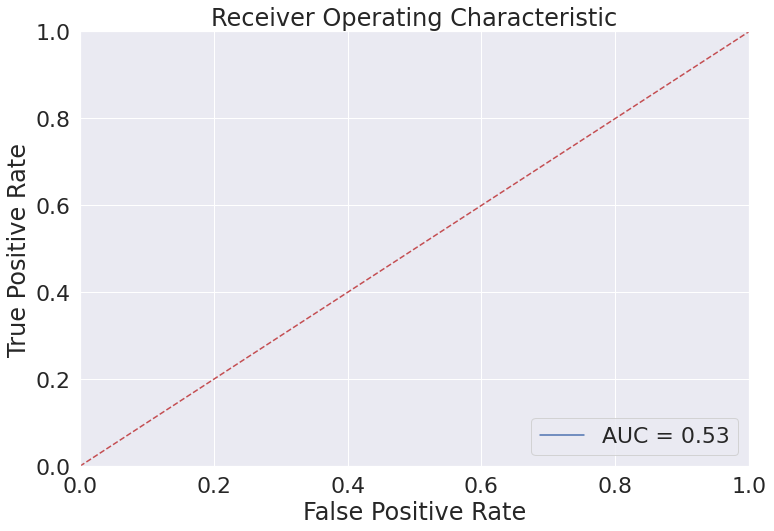

In [36]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 3]
              precision    recall  f1-score   support

           0      0.222     1.000     0.363     36592
           1      0.500     0.000     0.000    128458

    accuracy                          0.222    165050
   macro avg      0.361     0.500     0.181    165050
weighted avg      0.438     0.222     0.080    165050



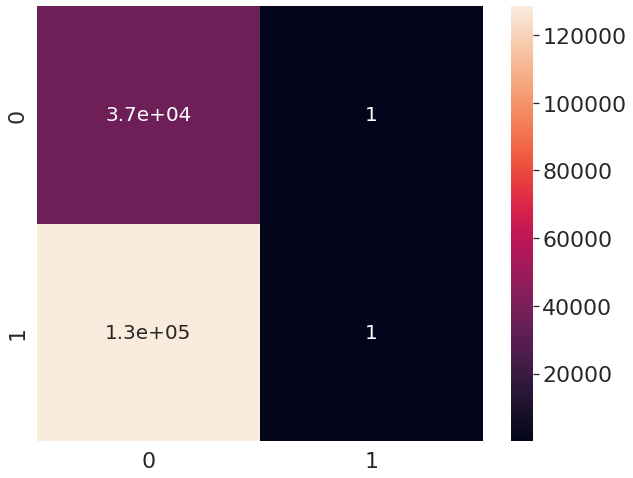

AUC score:  0.49999022813388877


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


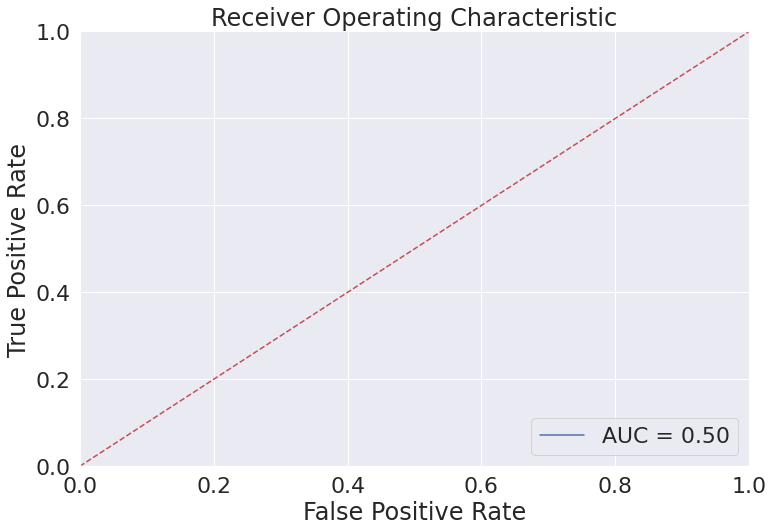

In [37]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [38]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.359     1.000     0.528     52572
           1      0.000     0.000     0.000     93817

    accuracy                          0.359    146389
   macro avg      0.180     0.500     0.264    146389
weighted avg      0.129     0.359     0.190    146389



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


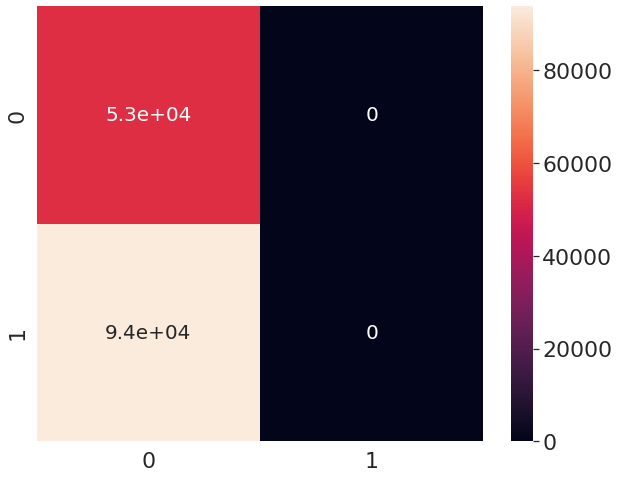

In [39]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.222     1.000     0.363     36592
           1      1.000     0.000     0.000    128458

    accuracy                          0.222    165050
   macro avg      0.611     0.500     0.181    165050
weighted avg      0.827     0.222     0.080    165050



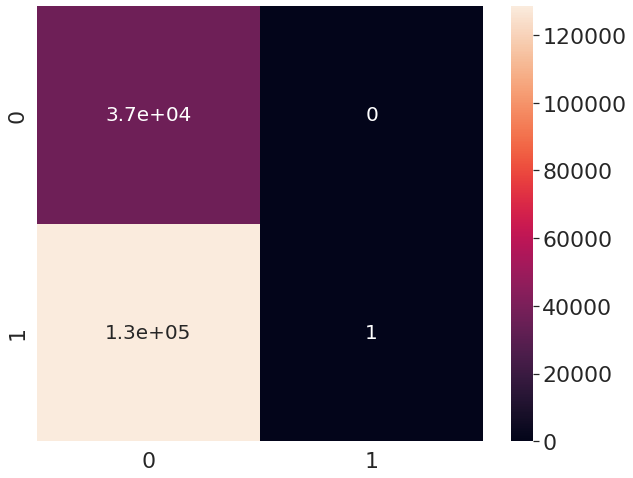

AUC score:  0.5000038923227825


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


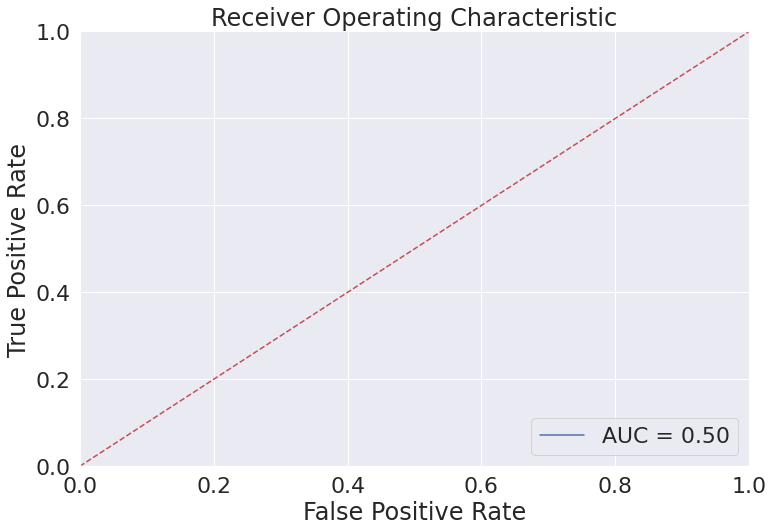

In [40]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [41]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.359     1.000     0.528     52572
           1      0.000     0.000     0.000     93817

    accuracy                          0.359    146389
   macro avg      0.180     0.500     0.264    146389
weighted avg      0.129     0.359     0.190    146389



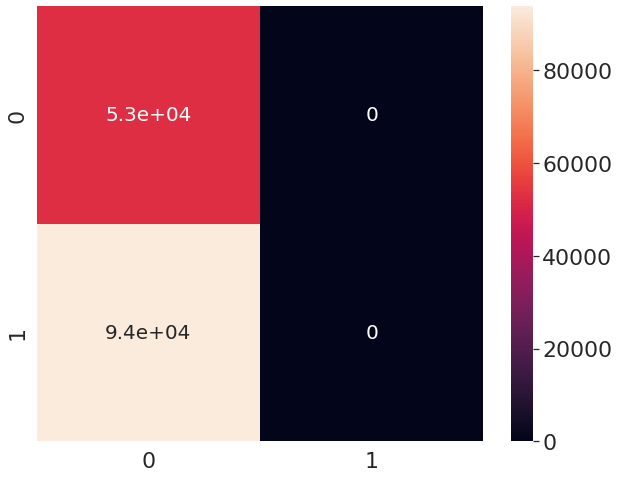

In [42]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.222     1.000     0.363     36592
           1      0.000     0.000     0.000    128458

    accuracy                          0.222    165050
   macro avg      0.111     0.500     0.181    165050
weighted avg      0.049     0.222     0.080    165050



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


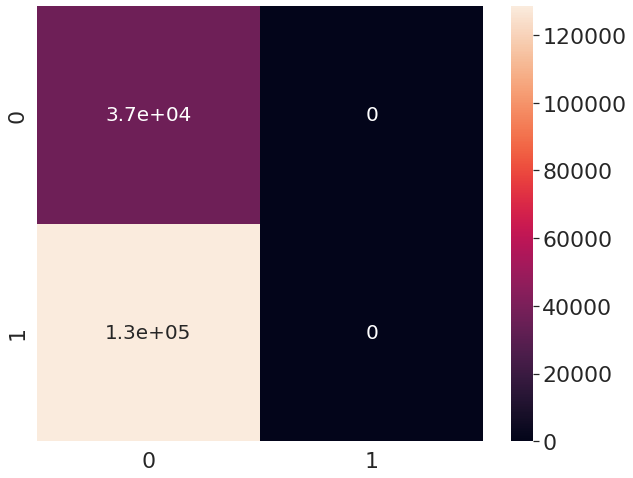

In [43]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [44]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.359     1.000     0.528     52572
           1      0.000     0.000     0.000     93817

    accuracy                          0.359    146389
   macro avg      0.180     0.500     0.264    146389
weighted avg      0.129     0.359     0.190    146389



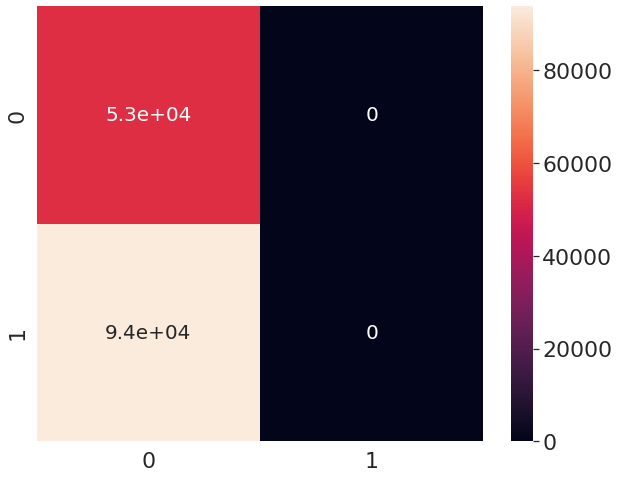

In [45]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.222     1.000     0.363     36592
           1      0.000     0.000     0.000    128458

    accuracy                          0.222    165050
   macro avg      0.111     0.500     0.181    165050
weighted avg      0.049     0.222     0.080    165050



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


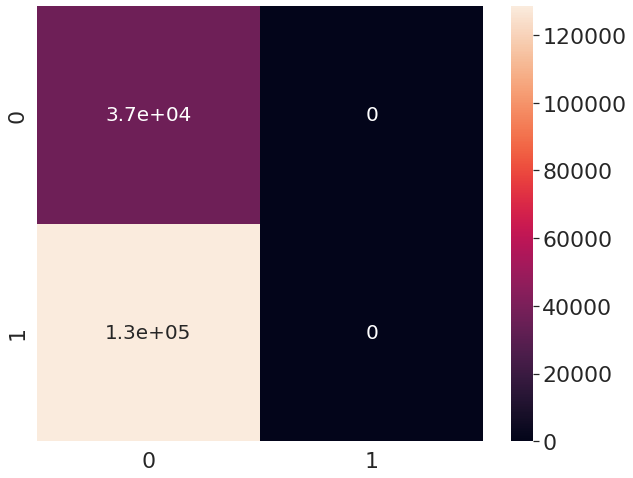

In [46]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [47]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.994     0.999     0.996     52572
           1      0.999     0.996     0.998     93817

    accuracy                          0.997    146389
   macro avg      0.997     0.998     0.997    146389
weighted avg      0.997     0.997     0.997    146389



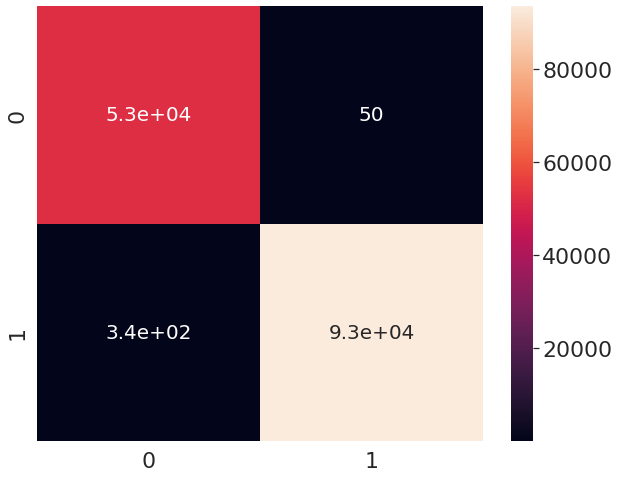

AUC score:  0.9977337414586929


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


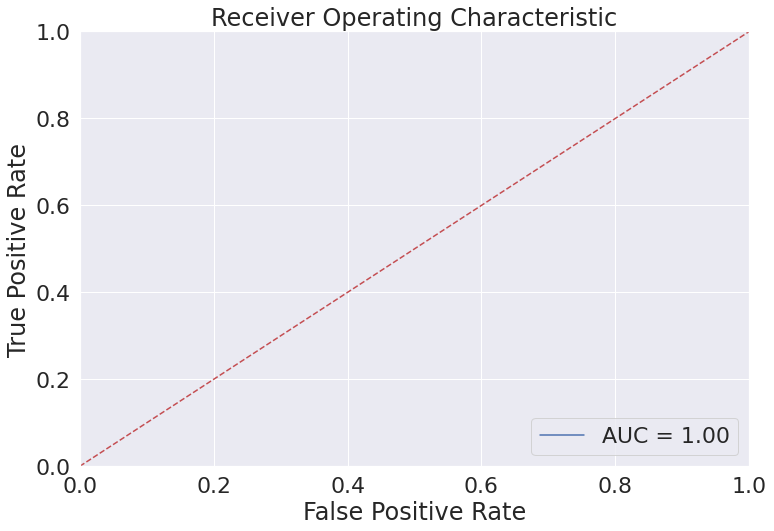

In [48]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.788     0.999     0.881     36592
           1      1.000     0.924     0.960    128458

    accuracy                          0.940    165050
   macro avg      0.894     0.961     0.921    165050
weighted avg      0.953     0.940     0.943    165050



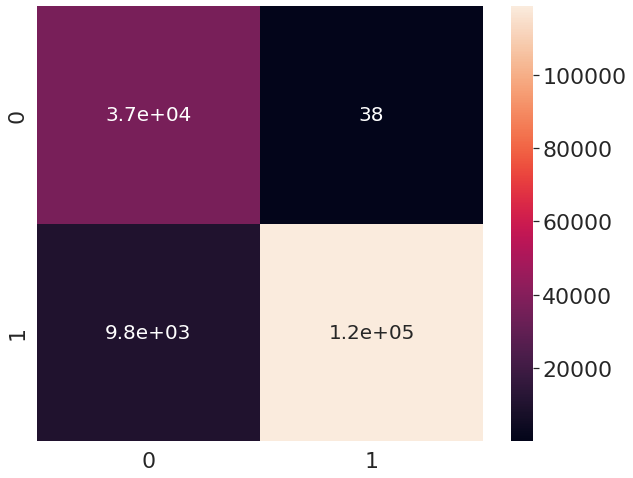

AUC score:  0.9612737203885886


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


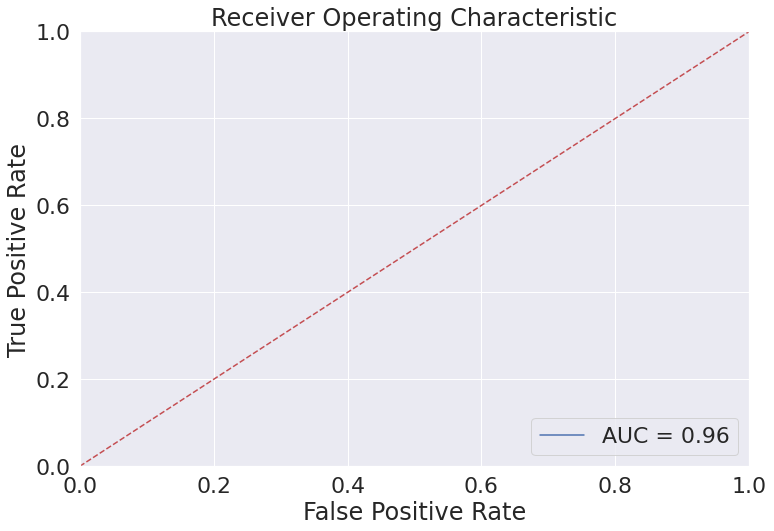

In [49]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [50]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

y_pred unique:  [0 2 3]
              precision    recall  f1-score   support

           0      0.449     1.000     0.620     52572
           1      1.000     0.312     0.476     93817

    accuracy                          0.559    146389
   macro avg      0.725     0.656     0.548    146389
weighted avg      0.802     0.559     0.528    146389



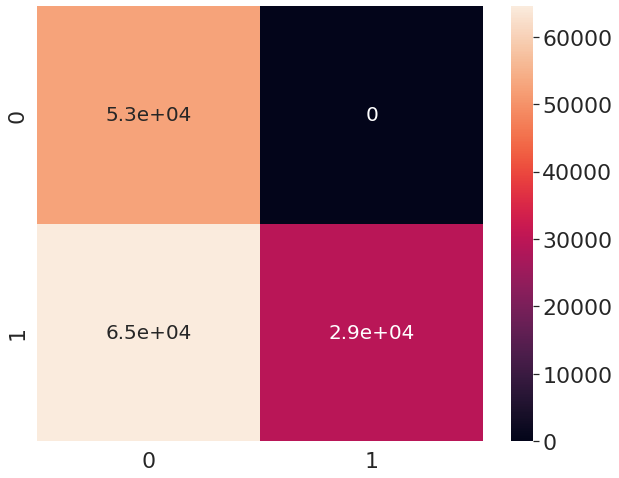

AUC score:  0.6562190221388448


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


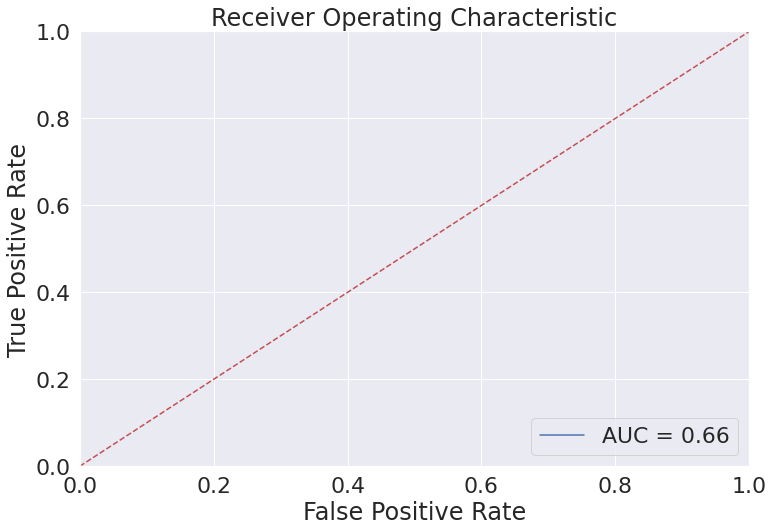

In [51]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36592
           1      1.000     1.000     1.000    128458

    accuracy                          1.000    165050
   macro avg      1.000     1.000     1.000    165050
weighted avg      1.000     1.000     1.000    165050



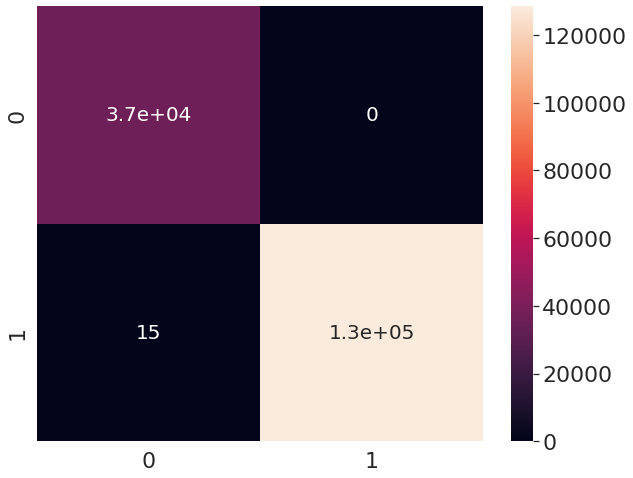

AUC score:  0.9999416151582619


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


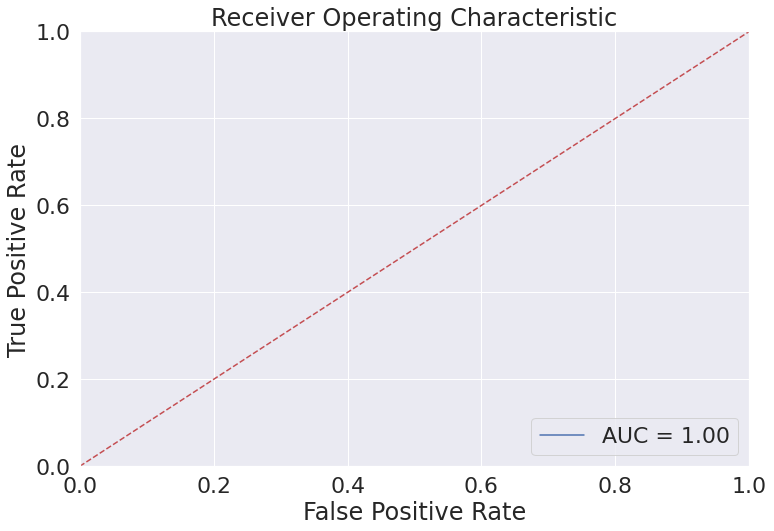

In [52]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [53]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     52572
           1      1.000     1.000     1.000     93817

    accuracy                          1.000    146389
   macro avg      1.000     1.000     1.000    146389
weighted avg      1.000     1.000     1.000    146389



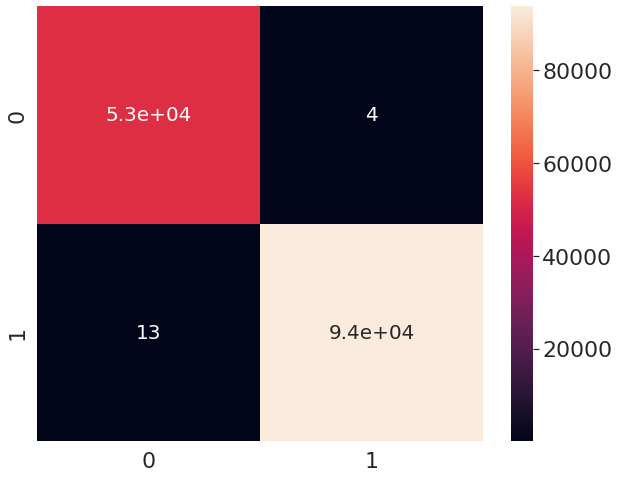

AUC score:  0.999892673116753


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


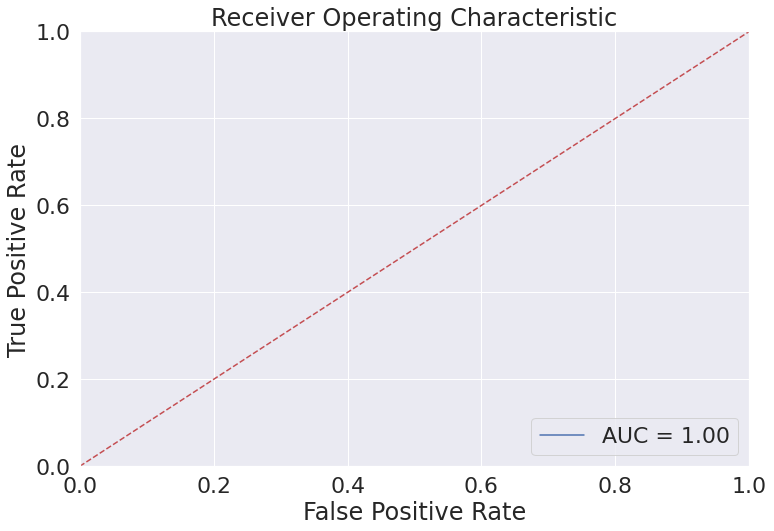

In [54]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36592
           1      1.000     1.000     1.000    128458

    accuracy                          1.000    165050
   macro avg      1.000     1.000     1.000    165050
weighted avg      1.000     1.000     1.000    165050



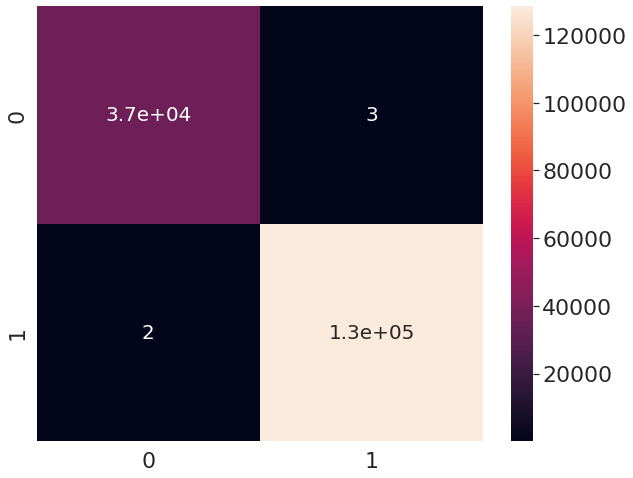

AUC score:  0.9999512227877538


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


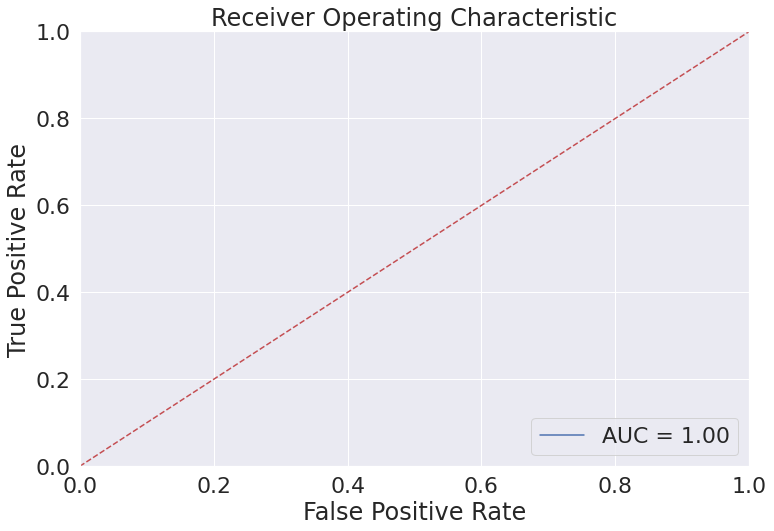

In [55]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [56]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

y_pred unique:  [0 1 2 3]
              precision    recall  f1-score   support

           0      0.465     1.000     0.634     52572
           1      1.000     0.354     0.523     93817

    accuracy                          0.586    146389
   macro avg      0.732     0.677     0.579    146389
weighted avg      0.808     0.586     0.563    146389



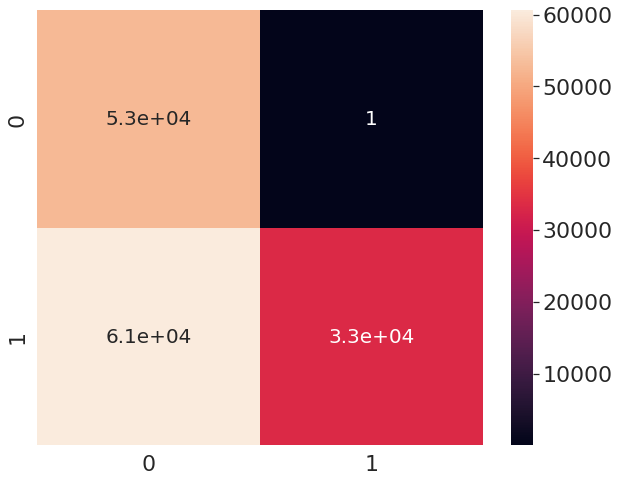

AUC score:  0.6770159750199709


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


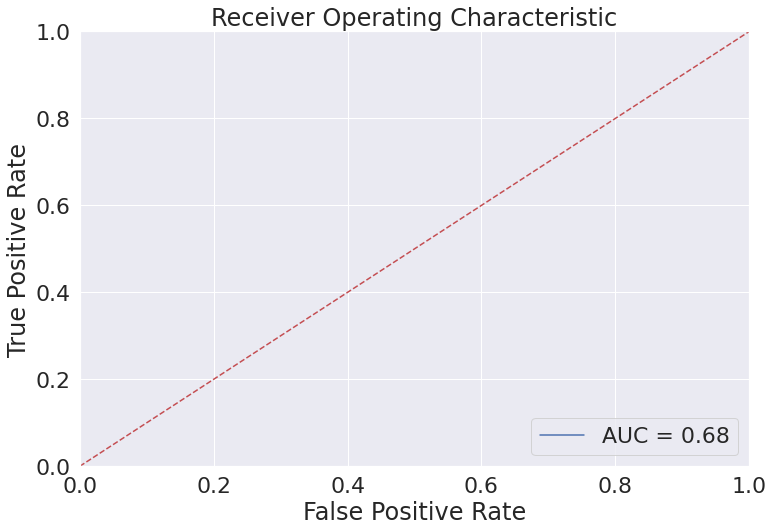

In [57]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36592
           1      1.000     1.000     1.000    128458

    accuracy                          1.000    165050
   macro avg      1.000     1.000     1.000    165050
weighted avg      1.000     1.000     1.000    165050



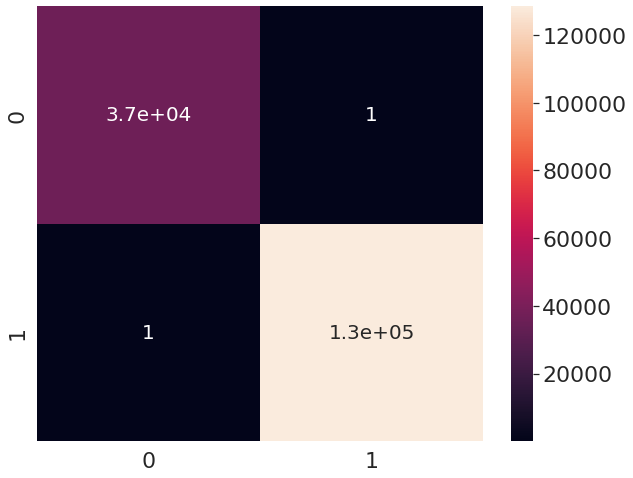

AUC score:  0.9999824434883238


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


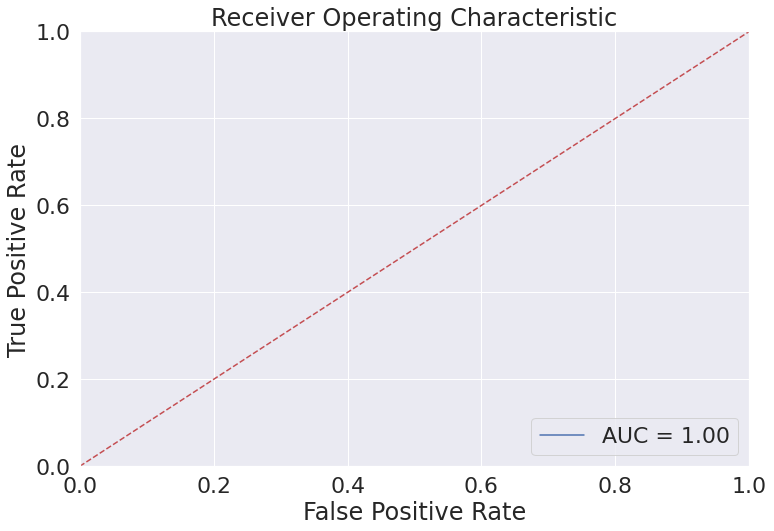

In [58]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [59]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     52572
           1      1.000     1.000     1.000     93817

    accuracy                          1.000    146389
   macro avg      1.000     1.000     1.000    146389
weighted avg      1.000     1.000     1.000    146389



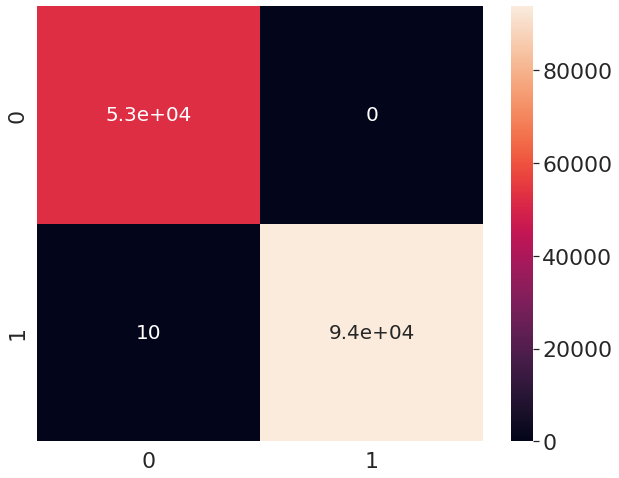

AUC score:  0.9999467047550017


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


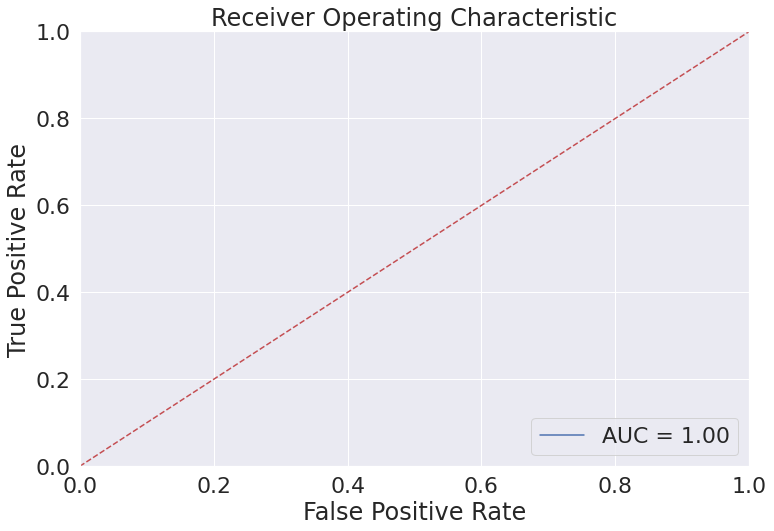

In [60]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.826     1.000     0.905     36592
           1      1.000     0.940     0.969    128458

    accuracy                          0.953    165050
   macro avg      0.913     0.970     0.937    165050
weighted avg      0.962     0.953     0.955    165050



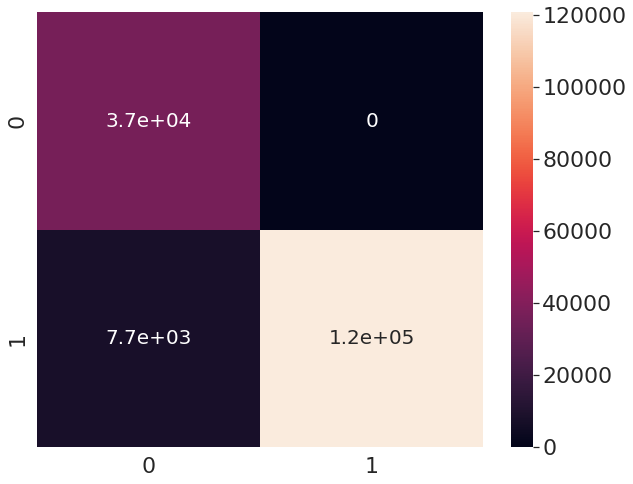

AUC score:  0.9700719301250214


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


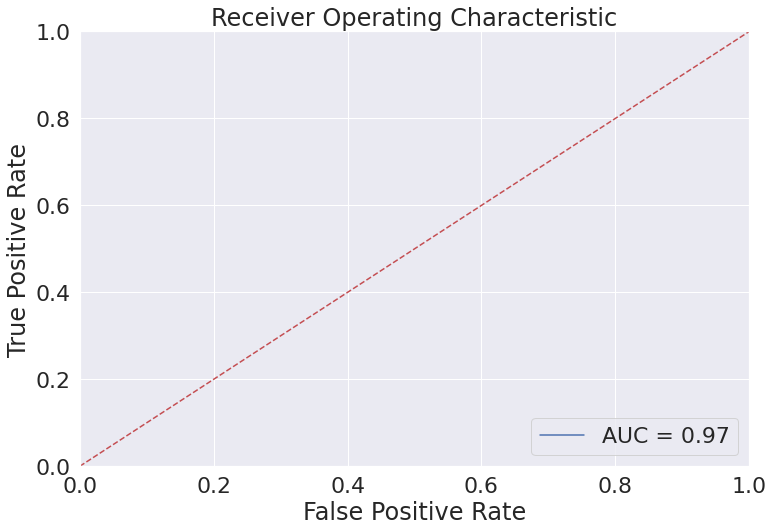

In [61]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [62]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

y_pred unique:  [0 3 4 5]
              precision    recall  f1-score   support

           0      0.435     1.000     0.606     52572
           1      1.000     0.273     0.429     93817

    accuracy                          0.534    146389
   macro avg      0.718     0.636     0.518    146389
weighted avg      0.797     0.534     0.492    146389



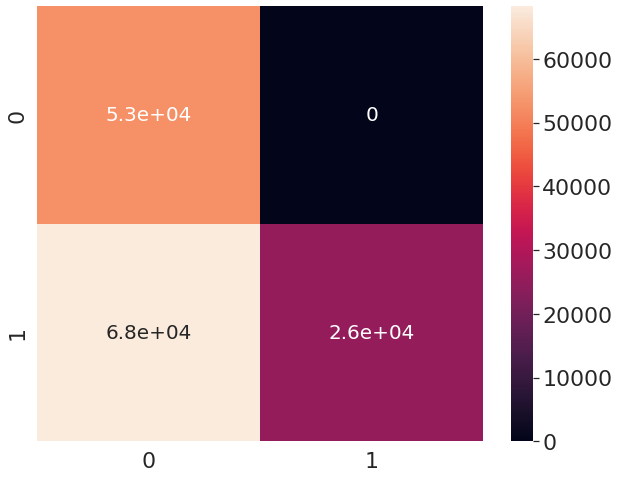

AUC score:  0.6363558843280003


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


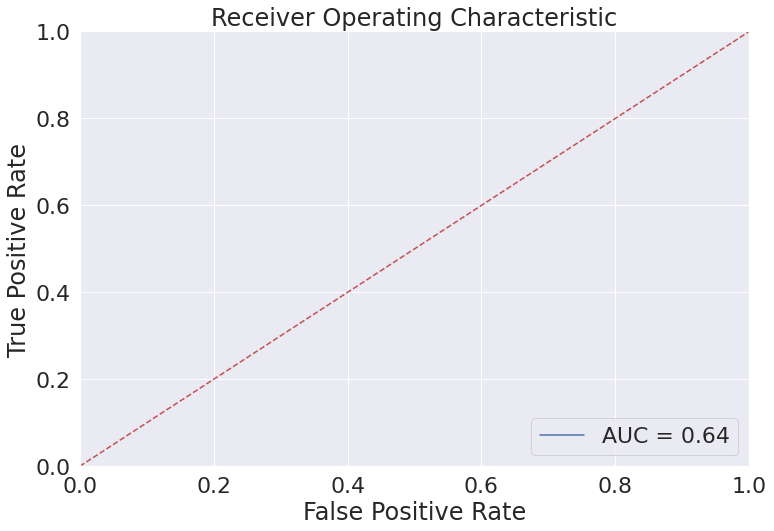

In [63]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36592
           1      1.000     1.000     1.000    128458

    accuracy                          1.000    165050
   macro avg      1.000     1.000     1.000    165050
weighted avg      1.000     1.000     1.000    165050



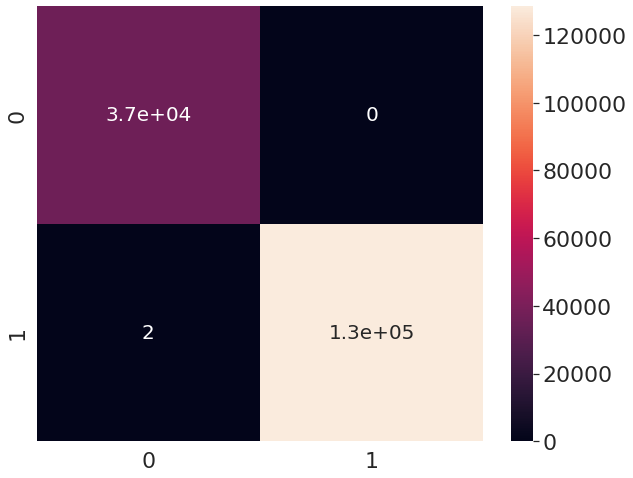

AUC score:  0.9999922153544349


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


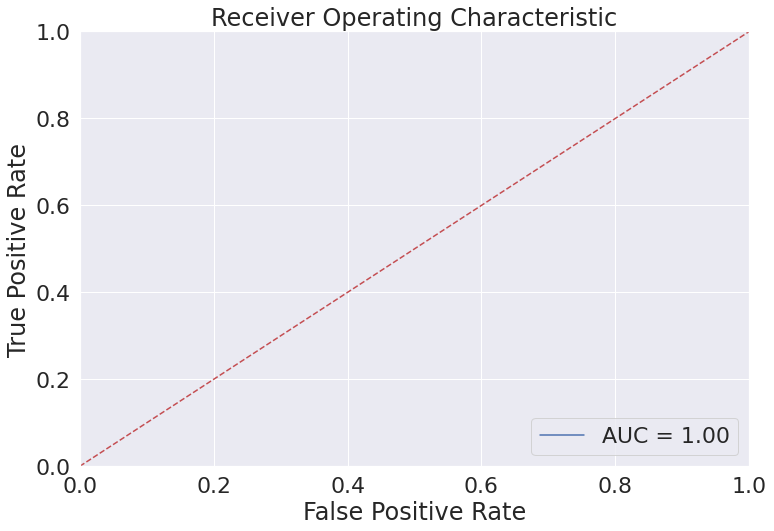

In [64]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)